<a href="https://colab.research.google.com/github/Jaypardeshii/EDA-Hotel-Booking-Analysis/blob/main/Group_EDA_Hotel_Booking_Analysis_Capstone_Project_space_needle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking is governed by many factors:-**
## **Including the type of hotel, time of the year,number of guests, types of customers, country, preferences etc.**

## **The basic objective of this project is to Explore and analyze the given data and to discover important factors that govern these bookings.**



# **Importing Libraries and importing the dataset provided**

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# #mounting drive

# from google.colab import drive
# drive.mount('/content/drive/')
#accessing it by link
url = "https://drive.google.com/file/d/1EGYfR6Q0LIN7DWJg9rp0WMwVcW9F9UG4/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [3]:
# #importing dataset 

# hoteldb = pd.read_csv('/content/drive/MyDrive/Alma/Hotel Bookings.csv')

hoteldb = pd.read_csv(url)



# **Overview of the dataset** 

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying night*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

In [4]:
#top 5 rows

hoteldb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#last 5 rows

hoteldb.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
#calculate basic statistical data

hoteldb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# Gives a list of columns

list(hoteldb.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [8]:
#total rows and columns count

hoteldb.shape

(119390, 32)

In [ ]:
#Prints number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column

hoteldb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#checks Datatypes

hoteldb.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## **FOR CHECKING UNIQUE CONTENTS**

In [10]:
hoteldb['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [11]:
hoteldb['is_canceled'].unique()

array([0, 1])

In [12]:
hoteldb['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [13]:
hoteldb['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [14]:
hoteldb['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [15]:
hoteldb['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [16]:
hoteldb['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

# **Now, we'll perform a quick check for missing/Null values**

In [17]:
#check for missing values

hoteldb.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

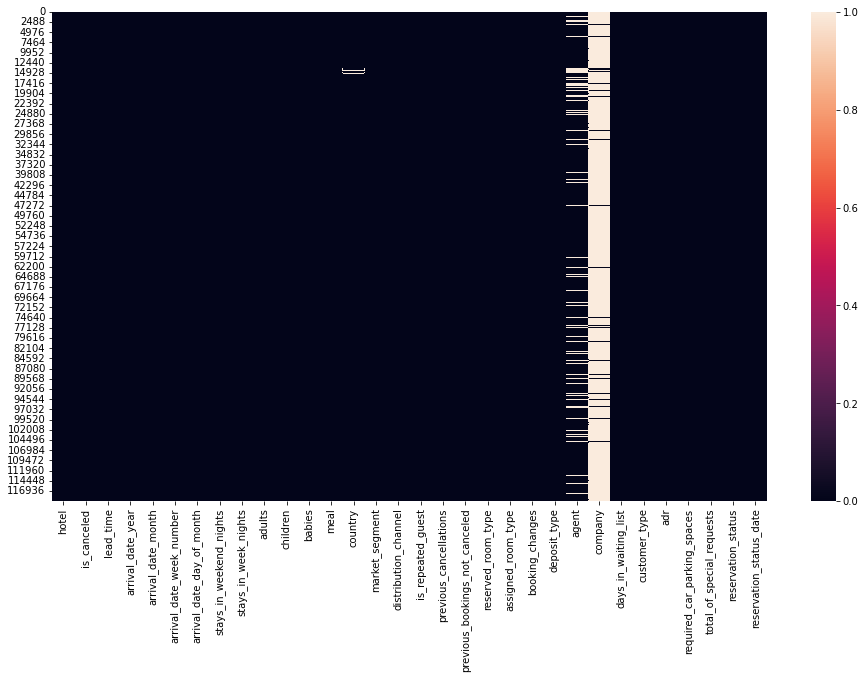

In [18]:
# visualize missing value using heatmap to get idea where is the value missing

plt.figure(figsize=(16,9))
sns.heatmap(hoteldb.isnull())

## **Since, we can see agent, company and country are having most null values, we'll check what's in them**

In [19]:
#checking contents of agent column

agentlist = hoteldb['agent'].tolist()
#list(agentlist) #remove # to view its contents

In [20]:
#checking contents of company column

companylist = hoteldb['company'].tolist()
#list(companylist) #remove # to view its contents

In [21]:
#checking contents of country column

countrylist = hoteldb['country'].tolist()
#list(countrylist) #remove # to view its contents

# **Cleaning Data**

**From the above data, it is clear that we won't be requiring agent and company data but we need country data and NULL values within it needs to be taken care of. So we'll be doing proper CLEANSING of data**

In [22]:
#Removing company and agent column

hoteldb= hoteldb.drop(columns=['agent', 'company'])

#Removing missing values

hoteldb = hoteldb.dropna()
print(hoteldb.isna().sum(axis=0))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [23]:
# converting all the null values to 0 for proper analysis

df = hoteldb.fillna(0)

In [24]:
# how many null values left(will be depicted by 0)

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [25]:
# in country column, we need to replace zeros with something more adequate

hoteldb.country = hoteldb.country.replace(0, "not mentioned")

# **NOW WE HAVE CLEAN DATA FOR PROPER EDA**

**Let's get basic idea of statistics through visualization**

##**From the histograms below we can have a brief picture of various column trends**


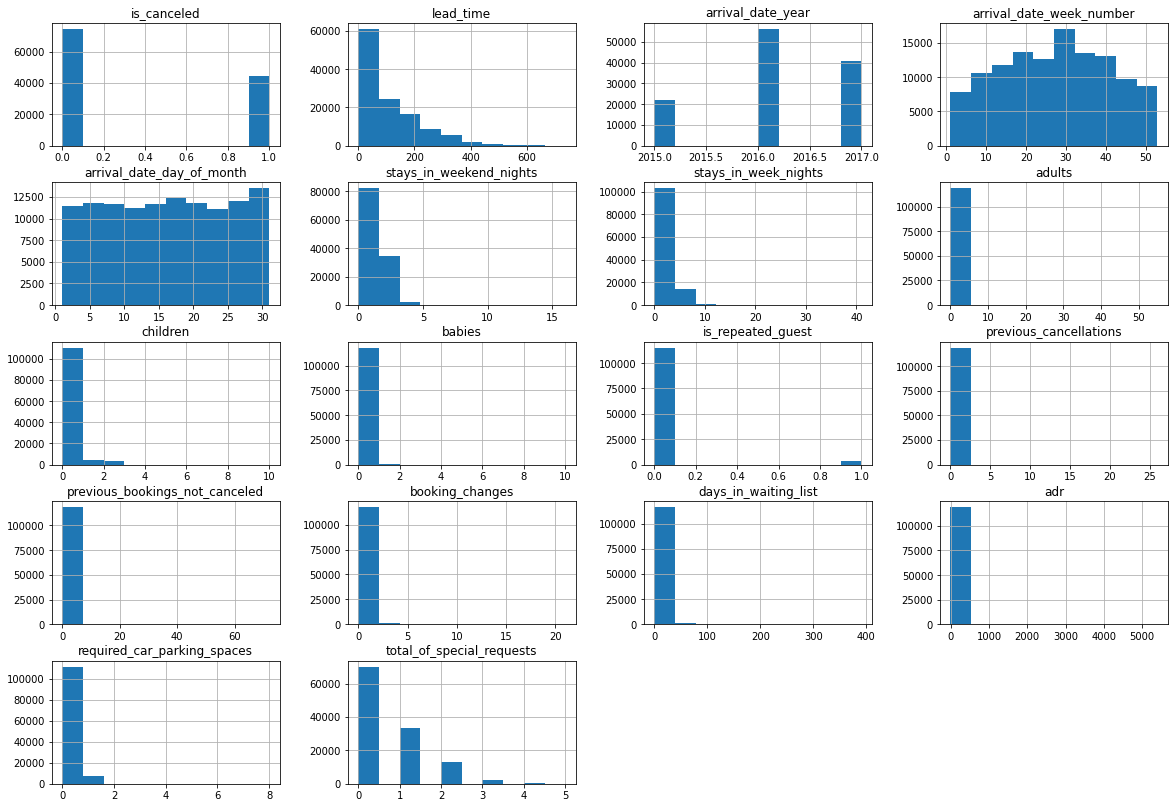

In [26]:
# Printing a histogram which shows column trends which have data type int64
hoteldb.hist(figsize=(20,14))
plt.show()

## **Univariate Analysis**

### Booking ratio of both hotels

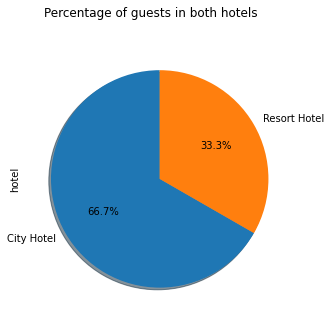

In [27]:
# Booking ratio of both hotels

dff=hoteldb['hotel'].value_counts()
diagram=dff.plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(10,5), autopct='%1.1f%%', title = 'Percentage of guests in both hotels' )

Insight- 
1. City hotels have 66.7% ratio weightage and resort hotels have only 33.3%

### Repeated guests ratio

Text(0.5, 1.0, 'Proportion of Repeated Guests')

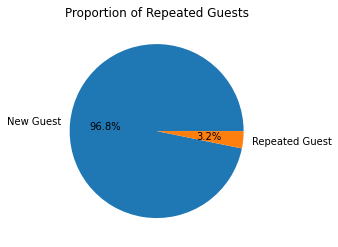

In [28]:
# repeated guests ratio

plt.pie(hoteldb["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"], autopct='%1.1f%%')
plt.title ("Proportion of Repeated Guests")

Insight-
1. Retention rate of hotel is very low

### Total number of arrival of guest per month

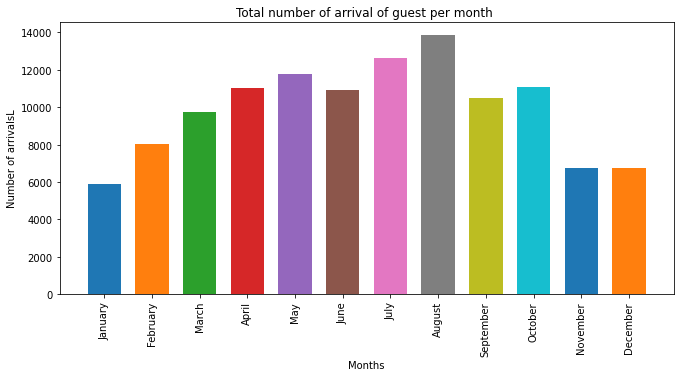

In [29]:
# Total number of arrival of guest per month 

x = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
z = list(hoteldb["arrival_date_month"].unique())
y = []

for i in x:
  y.append(hoteldb[hoteldb.arrival_date_month == i]["arrival_date_month"].count())


plt.figure(figsize=(11,5))
plt.bar(x, y, color = sns.color_palette(),
        width = 0.7)
plt.xlabel("Months")
plt.xticks(rotation= "vertical")
plt.ylabel("Number of arrivalsL")
plt.title("Total number of arrival of guest per month ")
plt.show()

Insight- 
1. Most number of guest comes in month of August.

### Top 10 Country's Tourist

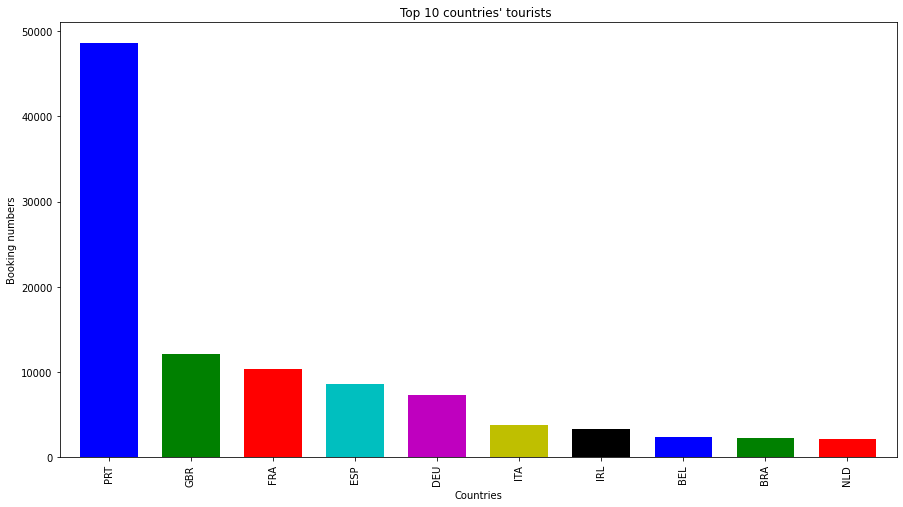

In [30]:
# Top 10 country's tourists

df=hoteldb['country'].value_counts().head(10)
df.plot(kind='bar',width=0.7 ,color=['b','g','r','c','m','y','k'],figsize=(15, 8))
plt.xlabel("Countries")
plt.ylabel("Booking numbers")
plt.title("Top 10 countries' tourists ")
plt.show()

Insight- 
1. Most guest are from Portugal and other Europian contries.

### Most prefered meals

In [31]:
# all types of meals

hoteldb["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

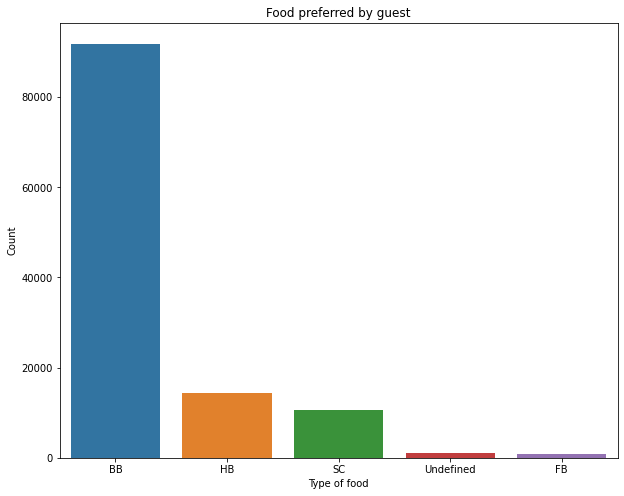

In [ ]:
# meal preference

plt.figure(figsize=(10,8))
sns.barplot(x=hoteldb['meal'].value_counts().keys(),y=hoteldb['meal'].value_counts())
plt.xlabel('Type of food')
plt.ylabel('Count')
plt.title('Food preferred by guest');

Insight- 
1. most preferred meal is BB and least preferred is FB.

### Most preferred channel for booking hotels

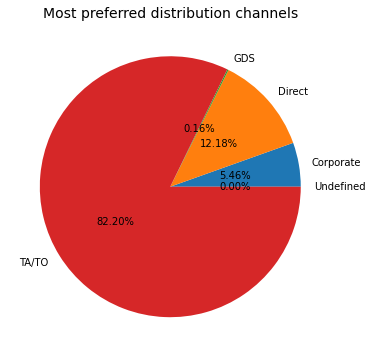

In [32]:
# most preferred channel for booking hotels

grup_by_dc = hoteldb.groupby(['distribution_channel'])
dc1 = pd.DataFrame(round((grup_by_dc.size()/hoteldb.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize=(12,6))
data = dc1['Booking_%']
labels = dc1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%",  labels=labels, pctdistance=0.5)
plt.title("Most preferred distribution channels", fontsize=14);

Insight- 
1. 82.2% booking were done from channel TA/TO(“TA” means “Travel Agents” and “TO” means “Tour Operators”).

## **Bivariate Analysis**


### Number of adults traveling with kids

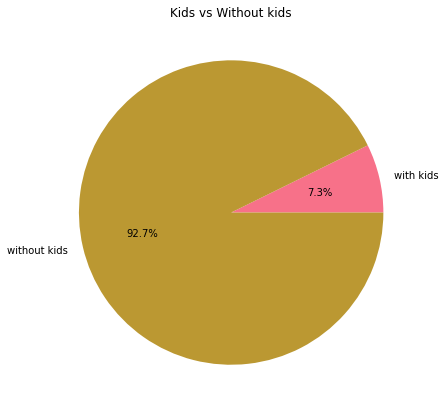

In [33]:
# number of adults traveling with kids/babies

x = ["with kids", "without kids"]
y = [hoteldb[(hoteldb.children != 0) | (hoteldb.babies != 0)]["adults"].count(), hoteldb[(hoteldb.children == 0) | (hoteldb.babies == 0)]["adults"].count()]

fig = plt.figure(figsize =(10, 7))
colors = sns.color_palette('husl')
plt.pie(y, labels = x, colors = colors,autopct='%1.1f%%')
plt.title("Kids vs Without kids")
plt.show()

Insight- 
1. Maximum people are traveling without kids and only 7.3% of all guests are traveling with kids

### Optimal stay length for city and resort type hotels.

In [34]:
#creating copy to add new colum for operation
hotels_df_copy=hoteldb.copy()

# Adding total days of stay in hotels.
hotels_df_copy['total_stay'] = hotels_df_copy['stays_in_weekend_nights']+hotels_df_copy['stays_in_week_nights']

# Adding total number of guest as column.
hotels_df_copy['total_people'] = hotels_df_copy['adults']+hotels_df_copy['children']+hotels_df_copy['babies']

# Group by of total stay and hotel
days_hotel = hotels_df_copy.groupby(['total_stay', 'hotel']).agg('count').reset_index()   
days_hotel = days_hotel.iloc[:, :3]                                                   # take 1st 3 columns
days_hotel = days_hotel.rename(columns={'total_stay': 'Number of days stayed' ,'is_canceled':'Number of stays'})

days_hotel

,Number of days stayed,hotel,Number of stays
0,0,City Hotel,324
1,0,Resort Hotel,377
2,1,City Hotel,13271
3,1,Resort Hotel,7525
4,2,City Hotel,21424
...,...,...,...
69,46,Resort Hotel,1
70,48,City Hotel,1
71,49,City Hotel,1
72,56,Resort Hotel,2


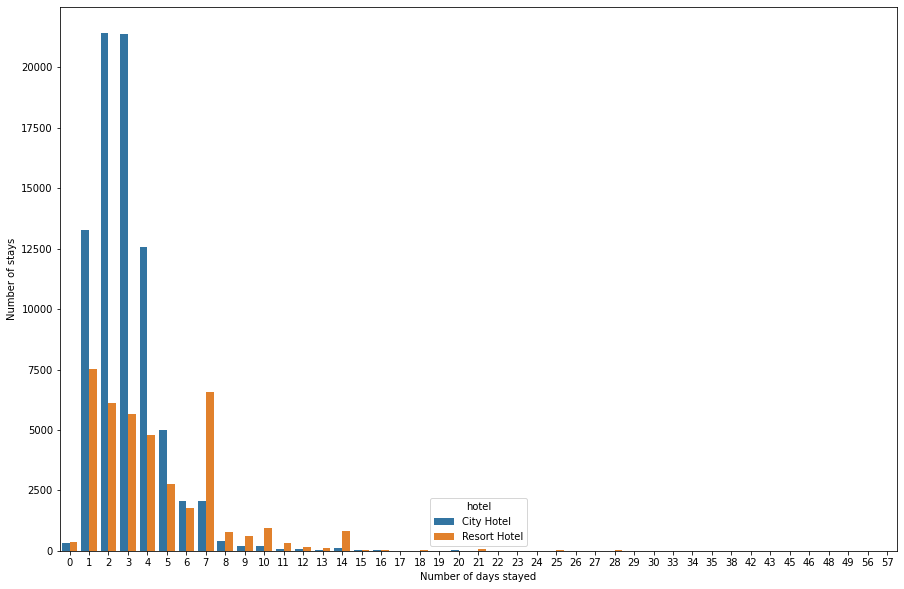

In [35]:
# Plotting the graph

# Setting figure size
plt.figure(figsize=(15,10))

# Plotting the graph
sns.barplot(x='Number of days stayed',y='Number of stays',hue='hotel',data=days_hotel)

Insight-
1. Optiomal days for stay is less than 7 days.

### Number of special requests made according to months

In [36]:
#To find number of special request for bookings made in different months.
special_request_Vs_month=hoteldb.groupby('arrival_date_month')['total_of_special_requests'].sum().reindex(['January','February','March','April','May','June','July','August','September','October','November','December']).reset_index()
special_request_Vs_month



,arrival_date_month,total_of_special_requests
0,January,3223
1,February,4218
2,March,4852
3,April,5774
4,May,6278
5,June,6167
6,July,8467
7,August,10193
8,September,5250
9,October,5491


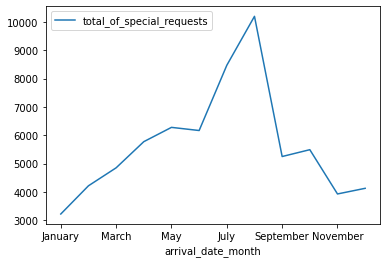

In [37]:
special_request_Vs_month.plot.line("arrival_date_month", "total_of_special_requests")

Insight- 
1. Maximum number of special requests are made between july and september.
2. Least requests are in january.
3. we can state that it depends on number of guests arrival.

### Number of stays in week nights vs Weekend nights.

In [38]:
#To find number of stays in week nights and weekend nights.

week_and_weekend_stay=hoteldb[['stays_in_weekend_nights','stays_in_week_nights']].sum().reset_index().rename(columns={'index':'time of week',0:'stays'})
week_and_weekend_stay

,time of week,stays
0,stays_in_weekend_nights,110444
1,stays_in_week_nights,297500


Text(0.5, 0, 'Nights of stay')

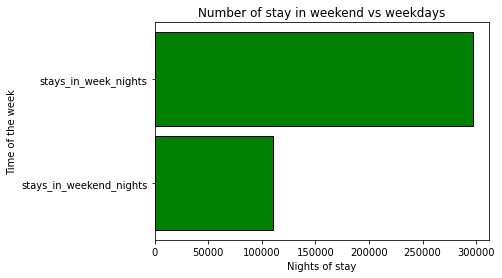

In [39]:
#Plotting number of week night and weekend nights on a bar chart

plt.barh(week_and_weekend_stay['time of week'],week_and_weekend_stay['stays'],color='green',edgecolor='black',height=0.9)
plt.title('Number of stay in weekend vs weekdays')
plt.ylabel('Time of the week')
plt.xlabel('Nights of stay')

Insight- 
1. As shown 110444 stay days were booked on week days and only 297500 stay days were booked on weekends.

### Bookings made through three main market segments from diffrent countries.

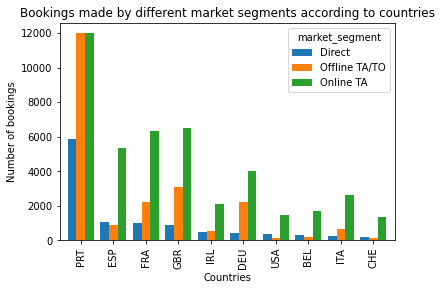

In [40]:
#Plotting bookings made through three main market segments by different countries' 

market_segment_by_country=hoteldb.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)


Insight-
1.  On average 'Online TA' is the most preferred channel and on average least preferred is 'Direct' channel. 
2. Maximum bookings are from Portugal country, followed by country GRB(United kingdom)


### Plotting in demand room and which room type genrates high ADR

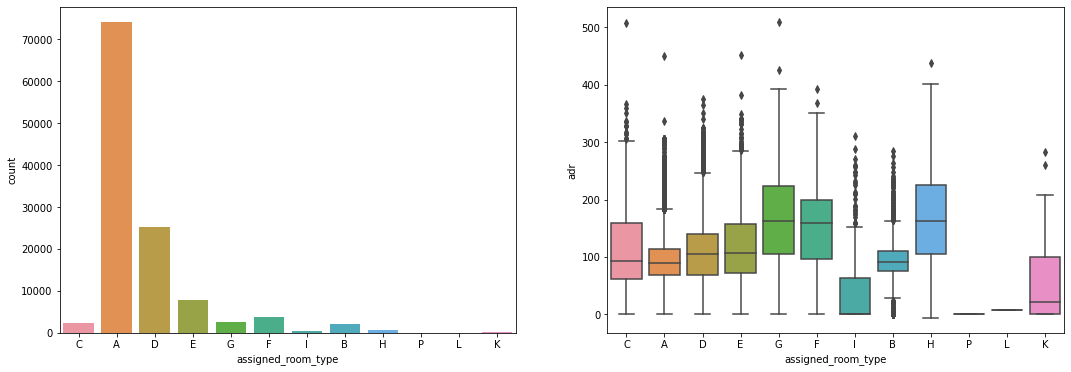

In [ ]:
# Plotting in demand room and which room type genrate high ADR

fig, axes = plt.subplots(1, 2, figsize=(18,6))

grp_by_room = hoteldb.groupby('assigned_room_type')
hoteldb['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = hoteldb['assigned_room_type'])                      # plotting in demand room
sns.boxplot(ax = axes[1], x = hoteldb['assigned_room_type'], y = hoteldb['adr'])    # pl0tting high adr genrating room
plt.show()

Insoght- 
1. We can see that 'A' type room is most in demand but on contrary room type 'H', 'G' and 'F' are most adr genrating rooms respectively

### Cancellation ration in both hotels type.(city hotel and resort hotel)

In [ ]:
#cancellation count

resort_cancellation=hoteldb[hoteldb["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
city_cancellation=hoteldb[hoteldb['hotel']=='City Hotel']["is_canceled"].value_counts()
total_cancel=hoteldb['is_canceled'].value_counts()

Text(0.5, 1.0, 'Resort Hotel')

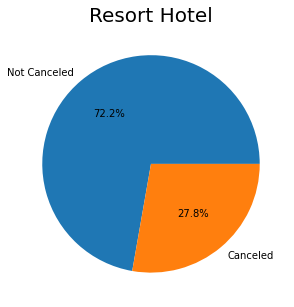

In [ ]:
#cancellations ratio in resort hotels

plt.pie(resort_cancellation,labels=["Not Canceled","Canceled"],autopct='%1.1f%%')
plt.title("Resort Hotel", fontsize=20)


Insight-
1. Resort hotels get 28% cancellation and 72% confirm booking out of all bookings.

Text(0.5, 1.0, 'City Hotel')

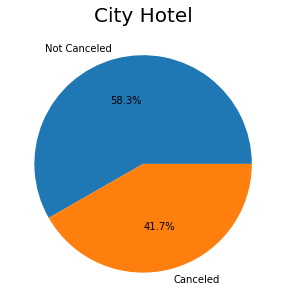

In [ ]:
#Cancellations ratio in city hotels

plt.pie(city_cancellation,labels=["Not Canceled","Canceled"],autopct='%1.1f%%')
plt.title("City Hotel", fontsize=20)


Insight-
1. City hotels get 41.7% cancellation and 58.3% confirm booking out of all bookings.

## **Multivariate Analysis**

### Correlation Analysis

In [ ]:
correlation = hoteldb.corr()
correlation

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Num_of_bookings
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,...,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658,NaN
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,...,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712,NaN
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,...,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531,NaN
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,...,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149,NaN
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,...,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,NaN
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,...,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671,NaN
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,...,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192,NaN
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,...,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884,NaN
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,...,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745,NaN
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,...,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889,NaN


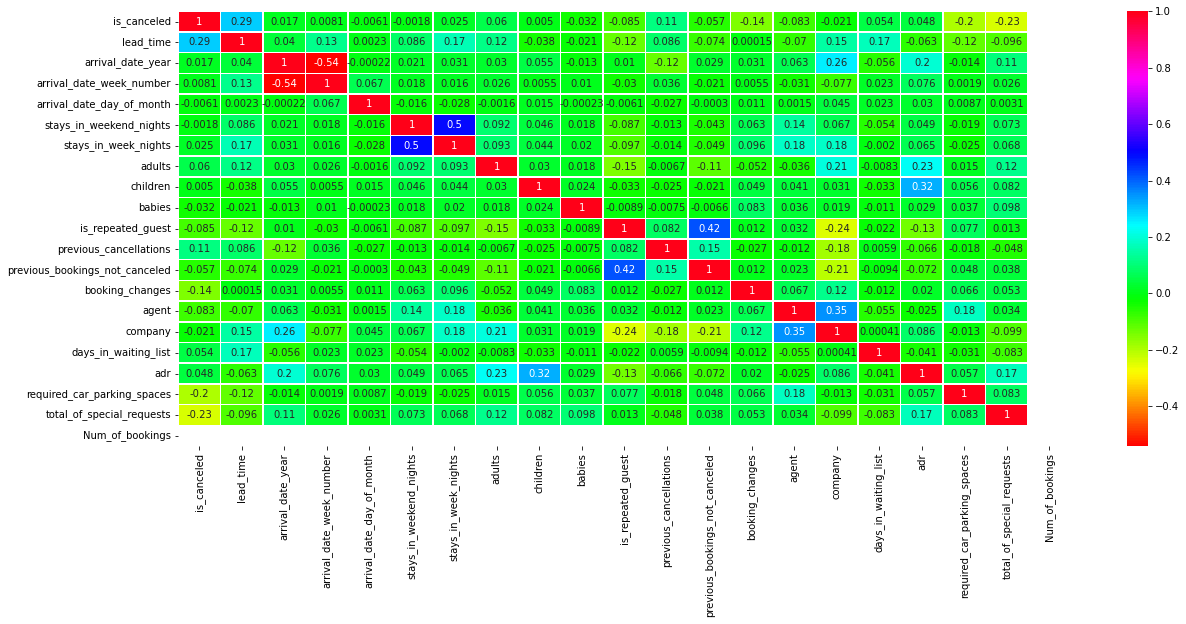

In [ ]:
# correlation graph of the data using heatmap

fig, ax = plt.subplots(figsize=(20,8))
dataplot = sns.heatmap(hoteldb.corr(), cmap="hsv", annot=True, linewidths=.5)
plt.show()

Insights- 

1. ADR(Average Daily Rate) and guests with children have slight positive corelation. which means more the kids, more is the ADR.

2. Total_stay and lead time have slight correlation.

3. Adr(Average Daily Rate) is positively correlated with total guests. more the guest will generate more ADR

4.  Repeated guests and previous bookings not canceled has strong positive correlation. Repeated guests are more likely to not cancel their bookings.

5. Company and agents are slightly more correlated

6. Stays in week night and total stay are positively corelated, even more than weekend nights which says, longer stays are in week time only.

7.  lead_time and total_stay is positively corelated. That means more is the stay of customer more will be the lead time.

8.  Total people, total stay and  ADR has positive correlation which means more the people, longer the stay will give more revenue.


### Requirement of car parking spaces- year and month wise

Text(0.5, 0, 'Months')

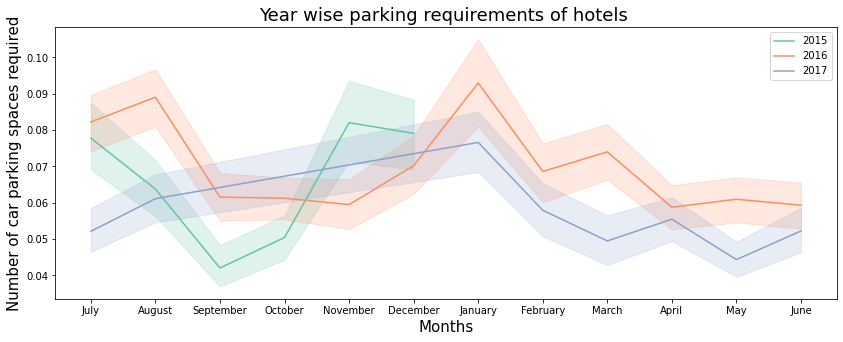

In [ ]:
#Creating a line chart to express the relation between the required number of car parking spaces and year by using seaborn

plt.figure(figsize=(14,5))
sns.lineplot(data=hoteldb,x="arrival_date_month", y="required_car_parking_spaces", hue = 'arrival_date_year', palette= 'Set2')
plt.legend(['2015', '2016', '2017'])
plt.title("Year wise parking requirements of hotels ", fontsize = 18)
plt.ylabel("Number of car parking spaces required",fontsize = 15)
plt.xlabel("Months",fontsize = 15)

Insights-
1. We can see in 2015-most parking spaces were needed in november and least in september. 
2. In 2016- most parking spaces were needed in january and least in november.
3. In 2017 most parking spaces were needed in january and least in may.

### Average daily rates(ADR) Monthwise.

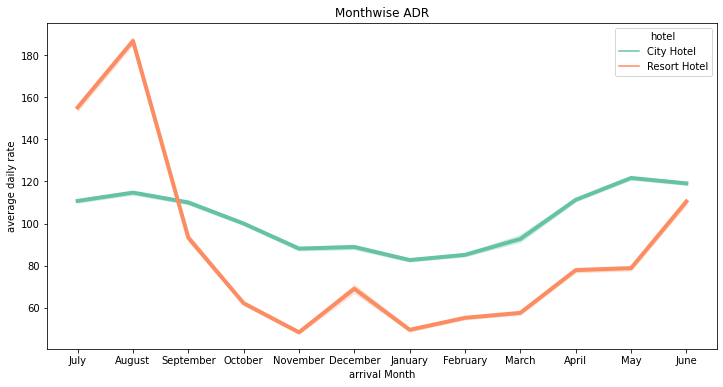

In [ ]:
#average daily rate monthwise = rooms revenue / rooms sold

plt.figure(figsize=(12,6))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=hoteldb,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set2',linewidth = 4)

plt.title("Monthwise ADR")
plt.xlabel("arrival Month")
plt.ylabel("average daily rate")
plt.show()

Insights- 
1. By comparing the "Total number of arrival of guest per month" chart with "Monthwise ADR" chart we can see that as the no. of guest increases ADR increases respectively.

### How does length of stay affects the ADR

In [ ]:
# Adding total staying days in hotels
hoteldb['total_stay'] = hoteldb['stays_in_weekend_nights']+hoteldb['stays_in_week_nights']

# Adding total people num as column.
hoteldb['total_people'] = hoteldb['adults']+hoteldb['children']+hoteldb['babies']

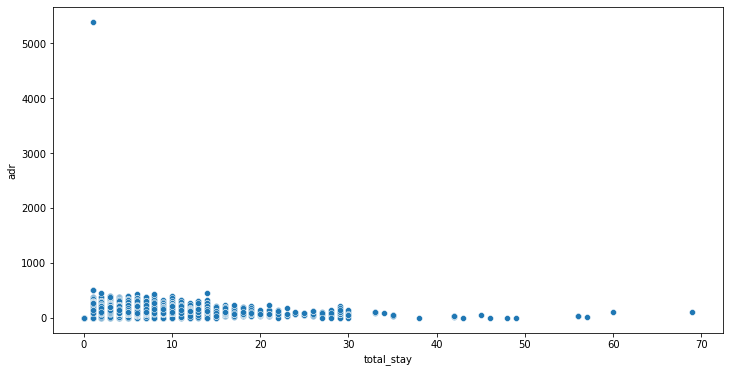

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hoteldb)
plt.show()

In [ ]:
hoteldb.drop(hoteldb[hoteldb['adr'] > 5000].index, inplace = True)   # there is an outlier in adr, so we removed that for better scatter plot

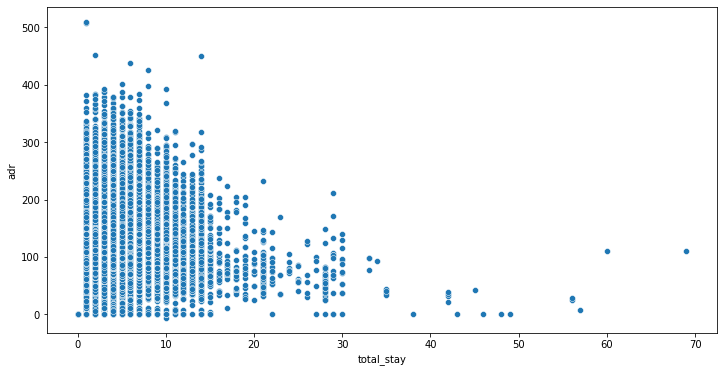

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = hoteldb)
plt.show()

Insight- 
1. From this we can see that as the length of stay increases adr decreases.

### Distribution channel with better revenue generating deals for hotels.

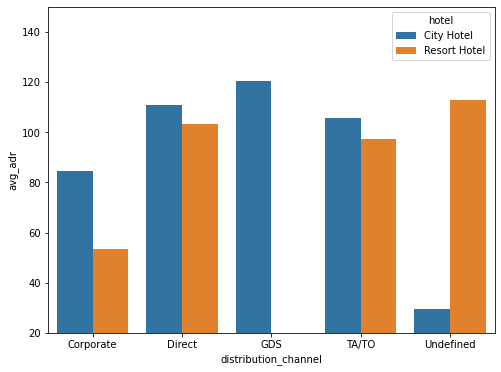

In [ ]:
# distribution channel with better revenue generating deals for hotels

group_by_dc_hotel = hoteldb.groupby(['distribution_channel', 'hotel'])
d4 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (8,6))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_adr'], hue = d4['hotel'])
plt.ylim(20,150)
plt.show()

Insight-

1. GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

2. Resort hotel has more revnue generating deals by direct and TA/TO channel. 

3. Resort Hotel need to increase outreach on GDS channel to increase revenue

# **CONCLUSION**

After careful analysis , we can conclude that the hotel industry can benefit a lot by studying the type of customers, their booking mode, the booking month and the seasons. The hotel industry market, their ADR and bookings are based on the type of customers,the month, types of meal, hotel type ,their country of origin, Room types, booking medium and many others.


# **SUGGESTIONS**

1. The hotel industry can take the advantage of seasons and months as ADR was highest in august (rainy season).
2. Most customers booked rooms online so they can be targeted with proper seasonal discounts and vacay-ads.
3. Since ADR was least during Nov and Jan, winter discounts(assumption) or off season discounts might help. 
4. For retention, they should introduce portugese meals(sea foods and meat) and eastern european meals as guests are more from there.
5. They should encourage direct bookings by offering some special discounts as online bookings cancellation is high.
6. Since room A is booked more, they should take into account the factors how it is different from other rooms and implement the same in other rooms as well.
7. Since resort hotels are less preferred, they should look into the factors- might be High cost or guests requirements. 
